In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from tqdm import tqdm
import matplotlib.ticker as tk
import matplotlib.patches as mpatches
import glob as glob

In [2]:
import warnings
warnings.simplefilter('ignore') #ignores simple warning

In [3]:
sfdata=xr.open_dataset("E:\CobaStreamfunction\streamfunction_wmc.nc")
sf=sfdata['sf10-7']*10

In [4]:
#Read time-event excel data
csevt=pd.read_excel('E:\. Disertasi S3 Bismillah\Olah Data\CS Lim Index V Based Event Data RM3.xlsx')
csevt=csevt.set_index('time_peak')

In [5]:
#Date event CS CENS no CENS (1-->CENS, 0-->no CENS)
n_cens = 2
evt_cens_cs = []
for i in range(n_cens):
    evt_cens = csevt[csevt['censevt'] == i].index
    print("Number of CS {i} = {n} dari {x}".format(i=i, n=len(evt_cens), x=len(csevt)))
    print("Number of CS {i} = {n}%".format(i=i, n=(len(evt_cens)*100/len(csevt.index))))
    evt_cens_cs.append(evt_cens.values)

Number of CS 0 = 127 dari 201
Number of CS 0 = 63.18407960199005%
Number of CS 1 = 74 dari 201
Number of CS 1 = 36.81592039800995%


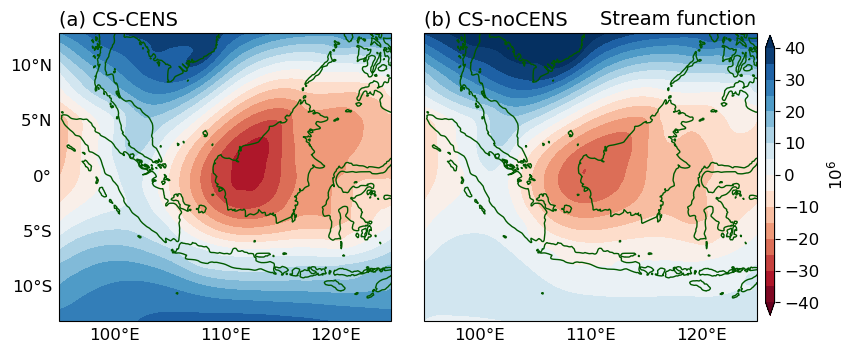

In [6]:
nameevt=['CS-noCENS', 'CS-CENS']
alpha=['(b)','(a)']
fig=plt.figure(figsize=(9,4))
for img, sbp in zip([1,0], [121,122]):
    ax = plt.subplot(sbp, projection=ccrs.PlateCarree())

    #Pengaturan garis pantai
    ax.coastlines(color='#005a00', linewidth=1)
    
    ax.set_extent([95, 125, -13, 13])
    
    #Mengatur tampilan lat lon
    gl=ax.gridlines(draw_labels=True, linewidth=0) 
    gl.top_labels = False 
    gl.right_labels = False 
    gl.xlocator = tk.FixedLocator(np.arange(100, 121, 10)) 
    #gl.ylocator = tk.FixedLocator(np.arange(-15, 16, 5)) 
    if img==0:
       gl.left_labels = False  
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12} 
    
    sfcol=ax.contourf(sf['lon'], sf['lat'], sf.sel(time=np.in1d(sf.time, evt_cens_cs[img])).mean(dim='time'),
                     levels=np.arange(-40,40.1,5), extend='both',
                     cmap='RdBu')
    
    ax.set_title(alpha[img]+' '+nameevt[img], fontsize=14, loc='left')
    if img==0:
        ax.set_title('Stream function', fontsize=14, loc='right')
    
    #Jika ingin menyimpan file
    #plt.savefig('folder/namafile.jpg', dpi=200)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sfcol, cax=cbar_ax)
cbar.ax.set_ylabel('$\mathregular{10^{6}}$', fontsize=12)
cbar.ax.tick_params(labelsize=12)
plt.subplots_adjust(wspace=0.1)
plt.show()

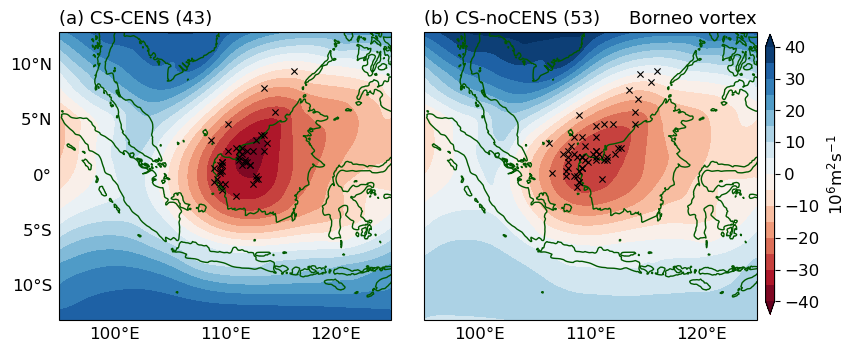

In [14]:
nameevt=['CS-noCENS', 'CS-CENS']
alpha=['(b)','(a)']
fig=plt.figure(figsize=(9,4))
for img, sbp, nm in zip([1,0], [121,122], ['cens','nocens']):
    ax = plt.subplot(sbp, projection=ccrs.PlateCarree())

    #Pengaturan garis pantai
    ax.coastlines(color='#005a00', linewidth=1)
    
    ax.set_extent([95, 125, -13, 13])
    
    #Mengatur tampilan lat lon
    gl=ax.gridlines(draw_labels=True, linewidth=0) 
    gl.top_labels = False 
    gl.right_labels = False 
    gl.xlocator = tk.FixedLocator(np.arange(100, 121, 10)) 
    #gl.ylocator = tk.FixedLocator(np.arange(-15, 16, 5)) 
    if img==0:
       gl.left_labels = False  
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12} 
    tvort=[]
    for folder in glob.glob("C:/Users/nariz/Script Phyton/Bismillah Disertasi/Borneo Vortex/so35"+nm+"/V/*"):
        file=np.sort(glob.glob(folder+"/V-L*"))
        for name in file:
            #print()
            vortdata=pd.read_csv(name)
            vortdata['time']= pd.to_datetime(vortdata['time'], format='%Y-%m-%d')
            logic1=vortdata['lat']>-2.5
            logic2=vortdata['lon']<120
            logic=np.logical_and(logic1, logic2)
            vortplot=vortdata[logic][vortdata[logic]['So']==vortdata[logic]['So'].max()]
            if len(vortplot)==0:
                continue
            tvort.append(vortplot['time'].values)
            ax.scatter(vortplot['lon'], vortplot['lat'], c='k', s=20, marker='x', zorder=4, linewidths=0.8)
            #print(vortplot['time'].values, vortplot['lon'].values, vortplot['lat'].values)
    tvort=np.ndarray.flatten(np.array(tvort))
    sfcol=ax.contourf(sf['lon'], sf['lat'], sf.sel(time=np.in1d(sf.time, tvort)).mean(dim='time'),
                     levels=np.arange(-40,40.1,5), extend='both',
                     cmap='RdBu')
    
    ax.set_title(alpha[img]+' '+nameevt[img]+' ('+str(len(tvort))+')', fontsize=13, loc='left')
    if img==0:
        ax.set_title('Borneo vortex', fontsize=13, loc='right')
    
    #Jika ingin menyimpan file
    #plt.savefig('folder/namafile.jpg', dpi=200)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sfcol, cax=cbar_ax)
cbar.ax.set_ylabel('$\mathregular{10^{6} m^{2} s^{-1}}$', fontsize=12)
cbar.ax.tick_params(labelsize=12)
plt.subplots_adjust(wspace=0.1)
#plt.savefig('E:\. Disertasi S3 Bismillah\Publikasi\Paper Hubungan CS dan CENS\Gambar/11_BV Streamfunction.jpg', dpi=500, bbox_inches='tight')
plt.show()